                                       Clustering Tutorial
                                            COMS3007

Group Members:

Akshar Nana - <b>2442321</b>
<br>Mikyle Singh - <b>2465557</b>
<br>Sayfullah Jumoorty - <b>2430888</b>
<br>Rayhaan Hanslod - <b>2430979</b>

3. We are now going to perform image colour segmentation / image compression. Load an image into your editor as a 3D matrix (the third dimension should have three values, for the red, green and blue values of each pixel). You can do this using imread() in Matlab or Python (in matplotlib in Python). You can use any image for this, or try with the one on Moodle: peppers.bmp. You can draw the image using the imshow() command.
Submit your code for this question, as well as TWO images (one could be the peppers image, but anything is fine) with the images redrawn using 4 clusters.

(a)	Load the image. For clustering, we don’t care about the x and y positions of each pixel: we just want to group all the colours into k clusters. The current dimension of your matrix is x × y × 3. Reshape this into a matrix that is N × 3, where N = x ∗ y is the number of pixels.

(b)	Choose k = 2.  Now run the k-means algorithm on this data as you did in the previous question. When this converges, you should have two cluster centres, and every colour is assigned to one of them. Each cluster centre is a point in 3D colour space, i.e., c1 = (r1, g1, b1) and c2 = (r2, g2, b2), which will be the average of every colour assigned to it.

(c)	Now redraw the image.   You need to take the original x*y*3, but for each (x, y) pixel,  replace its three values with the values of the appropriate cluster centre. Draw the final image using the imshow() command. If you did everything correctly, it should still resemble the original image, but only have two colours.



Old shape= (512, 512, 3) 
New shape= (262144, 3)
Old centroids:
 [[152 149  67]
 [161 204 124]]
Iterating:1...2...3...4...5...New centroids:
 [[123 120  64]
 [144 112  64]]


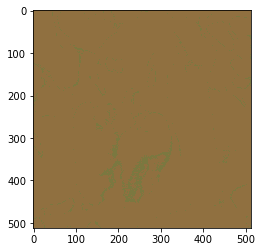

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the image
arrPhoto = plt.imread("peppers.bmp")
shape = arrPhoto.shape

# Reshape to N*3
x = shape[0]
y = shape[1]
arrPhotoReshaped = arrPhoto.reshape(x * y, shape[2])
print('Old shape=', shape, '\nNew shape=', arrPhotoReshaped.shape)
plt.imshow(arrPhoto)

def initCentroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def perform_kmeans(points, centroids, k):
    num_points = points.shape[0]
    cluster = np.empty(num_points, dtype=np.uint8)
    for i, point in enumerate(points):
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        centroid_num = np.argmin(distances)
        cluster[i] = centroid_num
    new_centroids = np.empty_like(centroids)
    for i in range(k):
        cluster_points = points[cluster == i]
        new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids, cluster

def plot_kmeans(k, max_iterations):
    #Plots k-means results
    centroids = initCentroids(arrPhotoReshaped, k)
    centroids = centroids.reshape(k, 3)
    print('Old centroids:\n', centroids)
    old_centroids = centroids.copy()
    new_centroids, cluster = perform_kmeans(arrPhotoReshaped, centroids.copy(), k)
    num = 0
    print('Iterating:', end="")
    while not np.array_equal(old_centroids, new_centroids) and num < max_iterations:
        num += 1
        print(num, end="...")
        old_centroids = new_centroids.copy()
        new_centroids, cluster = perform_kmeans(arrPhotoReshaped, old_centroids.copy(), k)
    print('New centroids:\n', new_centroids)
    num_elements = arrPhotoReshaped.shape[0]
    new_arr = new_centroids[cluster].reshape(x, y, 3).astype(np.uint8)
    plt.imshow(new_arr, interpolation='nearest')
    plt.show()

plot_kmeans(2, 5)



(d)	Repeat this process for k = {4, 8, 16, 32, 64}. What do you notice?

Old centroids:
 [[180 200  79]
 [ 94 156  80]
 [ 62   6   0]
 [125 162  72]]
Iterating:1...2...3...4...5...New centroids:
 [[132 143  68]
 [128 133  71]
 [125 115  61]
 [146 108  63]]


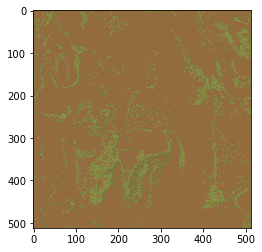

Old centroids:
 [[186  54  41]
 [171 211 155]
 [129 177  91]
 [137 159  65]
 [204  69  74]
 [163  37  30]
 [135  54  43]
 [111 120  64]]
Iterating:1...2...3...4...5...New centroids:
 [[126 125  62]
 [135 134  77]
 [130 119  58]
 [136 158  97]
 [137 149  74]
 [132 140  71]
 [148 101  60]
 [133 123  68]]


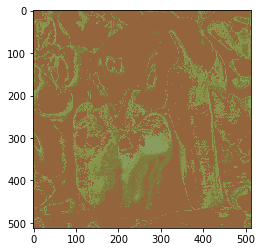

Old centroids:
 [[ 40  16   0]
 [131 132  50]
 [156 178  81]
 [196 200  84]
 [163  37  29]
 [119 177  91]
 [157 170  67]
 [128 196 108]
 [163 194 115]
 [192  58  31]
 [110  92  48]
 [137  25  31]
 [112 121  65]
 [ 63  48   0]
 [131 191 113]
 [106  86  40]]
Iterating:1...2...New centroids:
 [[177  52  36]
 [175 187 100]
 [ 96  46  37]
 [120 151  77]
 [183 100  59]
 [182 139 101]
 [188 154 107]
 [183 184 137]
 [109 117  57]
 [168 170  73]
 [172 184  85]
 [189  61  41]
 [144 110  71]
 [134 142  66]
 [205 170 140]
 [133 150  80]]


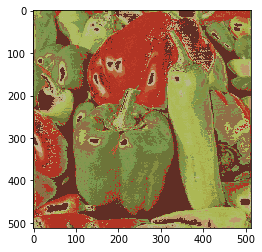

Old centroids:
 [[124  61  36]
 [157 178  77]
 [111 128  56]
 [179  91  72]
 [196  36  33]
 [153 219 162]
 [114 160  78]
 [167 188  83]
 [121  88  46]
 [102  38  29]
 [177 203  83]
 [ 95 150  66]
 [134  13  17]
 [ 67  10   7]
 [118 155  74]
 [110 174  93]
 [118 183  96]
 [188 219 176]
 [107 150  77]
 [117 171 102]
 [137  12   6]
 [176 195  83]
 [166  28  30]
 [155  33  34]
 [160 180  78]
 [126 112  64]
 [170 122  90]
 [146 177  89]
 [117   9   8]
 [201  50  39]
 [187  48  36]
 [212 162 128]]
Iterating:1...2...New centroids:
 [[159 149  73]
 [178 208 137]
 [161 181  79]
 [209 166 135]
 [207  66  46]
 [ 62  20  15]
 [158 195 113]
 [188 216 178]
 [172 172  75]
 [137 170  75]
 [197 218 185]
 [173 193  83]
 [196  52  38]
 [120 158  78]
 [186 201  93]
 [138 178 104]
 [156 173 114]
 [111 121  60]
 [129 169  90]
 [174 199 148]
 [179  51  36]
 [200 206 170]
 [196  85  52]
 [182  94  57]
 [189 206 139]
 [180 167  96]
 [212 190 176]
 [180 164 123]
 [167  37  31]
 [188 121  93]
 [150 104  59]
 [12

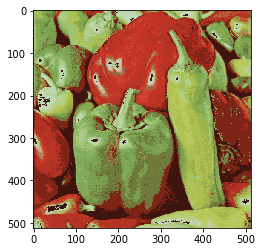

Old centroids:
 [[193  32  28]
 [198  55  38]
 [141 203 162]
 [ 67   1   2]
 [192  49  38]
 [195 198  78]
 [ 59   0   0]
 [160  61  28]
 [ 65   2   1]
 [192  53  35]
 [123 167  79]
 [ 96 157  68]
 [120 155  80]
 [193  59  38]
 [146  14  17]
 [135 188 105]
 [ 81  25   2]
 [113 142  73]
 [117 107  60]
 [189  60  24]
 [167  59  37]
 [173 186 118]
 [ 41   0   0]
 [ 41   1   0]
 [168 186 109]
 [149  16  18]
 [210  88  63]
 [145  21  27]
 [ 29   1   0]
 [168 195 102]
 [112 161  69]
 [ 90  31  19]
 [ 85  88  49]
 [ 90 139  61]
 [164 203  89]
 [185  41  32]
 [122 165  75]
 [125 169  81]
 [186  53  36]
 [  0   0   0]
 [110 173 108]
 [164 203 137]
 [103 114  54]
 [128 116 101]
 [197 207  82]
 [116 103  62]
 [134  54  25]
 [159 205 102]
 [213 126  62]
 [172 193  83]
 [157  18  19]
 [ 91   0   1]
 [196 187  63]
 [ 63   0   0]
 [146 178  94]
 [201  49  34]
 [126 152  67]
 [196  51  35]
 [172 184  90]
 [116  56  31]
 [107 132  73]
 [168 212 105]
 [161 190  87]
 [192 100  47]]
Iterating:1...2...New c

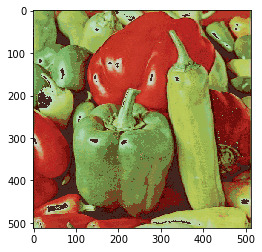

In [ ]:
# Perform k-means algorithm for different values of k
plot_kmeans(4, 5)
plot_kmeans(8, 5)
plot_kmeans(16, 2)
plot_kmeans(32, 2)
plot_kmeans(64, 2)

As the values of k increases, the image becomes more recognizable in comparison to the original image since a greater variance of colors are used. However for each iteration and k value of the k-means algorithm, the computational time is much longer.

Repeat the process for a new image

Old shape= (512, 512, 3) 
New shape= (262144, 3)
Old centroids:
 [[180 179 169]
 [166 197 208]]
Iterating:1...2...3...4...5...New centroids:
 [[135 137 114]
 [137 126 112]]


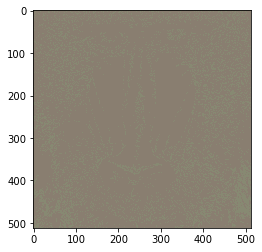

Old centroids:
 [[ 91  99  72]
 [174 158  62]
 [126 116  96]
 [238  67  20]]
Iterating:1...2...3...4...5...New centroids:
 [[132 144 129]
 [153 166 152]
 [133 132 110]
 [134 109  97]]


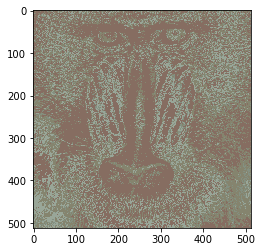

Old centroids:
 [[ 99 172 224]
 [158 163 154]
 [ 75 111 154]
 [154 149 101]
 [ 54  75  47]
 [ 68 128 112]
 [ 82 116  96]
 [ 90  81  40]]
Iterating:1...2...3...4...5...New centroids:
 [[171 188 183]
 [150 174 179]
 [133 135 116]
 [144 156 137]
 [143 188 215]
 [133 124 100]
 [127  92  76]
 [176 185 150]]


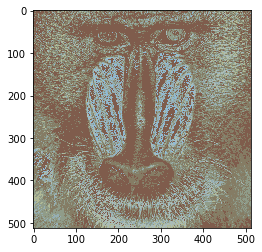

Old centroids:
 [[ 75  58  30]
 [ 82  94  67]
 [155 192 193]
 [ 73  53  36]
 [ 93  99  72]
 [143 171 151]
 [ 56  46  58]
 [ 57  55  78]
 [241  74  58]
 [102 128 103]
 [110 125 131]
 [129 156 111]
 [175 185 100]
 [195 201 209]
 [140 121  57]
 [188 206 220]]
Iterating:1...2...New centroids:
 [[185 170 103]
 [138 181 212]
 [119  72  55]
 [105 105  72]
 [175 177 147]
 [177 194 205]
 [103 126 120]
 [131 155 150]
 [170 132 126]
 [174 185 180]
 [153 189 208]
 [163 192 198]
 [185 194 178]
 [131  78  56]
 [191 189 158]
 [151 120  88]]


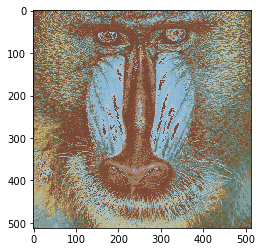

Old centroids:
 [[ 99 107  96]
 [253  78  34]
 [134 109  64]
 [128 171 185]
 [152 195 222]
 [177 171 116]
 [ 83 164 198]
 [118 144  86]
 [ 50  64  18]
 [106 108  84]
 [233  83  59]
 [ 63  76  30]
 [ 54  78  49]
 [248  74  42]
 [ 80 104 121]
 [ 40  76  26]
 [191 173 132]
 [209 194 120]
 [ 69  95 158]
 [117 128  78]
 [147 156 174]
 [129 111  71]
 [141 150 113]
 [160 145 103]
 [119 197 249]
 [129 181 146]
 [ 96 118  98]
 [ 78  81  59]
 [104 132 133]
 [172 163 128]
 [236  85  49]
 [ 61  59  78]]
Iterating:1...2...New centroids:
 [[153 157 124]
 [ 96  94  72]
 [174 160 101]
 [180 190 201]
 [177 157 154]
 [113  63  47]
 [148 184 209]
 [188 193 142]
 [157  81  64]
 [158 162 105]
 [183 119 127]
 [195 162  67]
 [125 135 106]
 [152  97  89]
 [134 157 163]
 [109 118  95]
 [165  91  65]
 [130 180 211]
 [135 178 211]
 [165 176 146]
 [187 196 195]
 [186 179 122]
 [172 187 190]
 [178 187 183]
 [174 156  90]
 [173 195 203]
 [146 167 159]
 [137 145 113]
 [157 179 195]
 [196 200 169]
 [191 146  91]
 [11

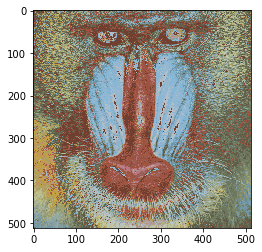

Old centroids:
 [[126 158 156]
 [ 88  91  54]
 [186  77  99]
 [107  86  67]
 [199 155  73]
 [ 94 113  93]
 [ 79  88  71]
 [124 195 233]
 [ 83 136 188]
 [ 61  59  63]
 [ 76  97  86]
 [ 89 135 125]
 [ 71  56  67]
 [200 170  85]
 [144 163  92]
 [150 154 134]
 [119 122  94]
 [100 118 127]
 [129 195 232]
 [109 123  64]
 [179 178 180]
 [138 143  93]
 [188 197 130]
 [162 197 228]
 [114 159 126]
 [ 93 118  81]
 [ 19  27  16]
 [ 62  25  25]
 [241  80  48]
 [ 91  97  64]
 [147 179 162]
 [246  65  27]
 [137 117  89]
 [ 73  88  42]
 [243  97  79]
 [ 97  97  67]
 [228 125  14]
 [178 159 103]
 [140 191 227]
 [194 208 160]
 [ 96 140 163]
 [118 118  63]
 [ 94  86  64]
 [127 166  99]
 [ 83  65  94]
 [174 188 219]
 [217 179  89]
 [ 90 114 154]
 [ 92  96 118]
 [ 91  41  19]
 [148 168 169]
 [146  77  73]
 [132 111  29]
 [ 88  91 106]
 [110 131 128]
 [143 114  43]
 [113 189 232]
 [ 57  57  46]
 [196 212 224]
 [172 192 195]
 [ 86  79  49]
 [101 121  91]
 [227  78  58]
 [ 96  81  60]]
Iterating:1...2...New c

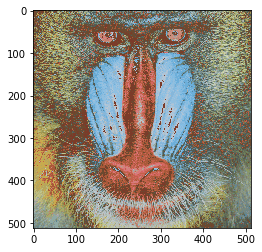

In [6]:
# Load the image
arrPhoto = plt.imread("BaboonRGB.bmp")
shape = arrPhoto.shape

# Reshape to N*3
x = shape[0]
y = shape[1]
arrPhotoReshaped = arrPhoto.reshape(x * y, shape[2])
print('Old shape=', shape, '\nNew shape=', arrPhotoReshaped.shape)
plt.imshow(arrPhoto)

plot_kmeans(2, 5)
plot_kmeans(4, 5)
plot_kmeans(8, 5)
plot_kmeans(16, 2)
plot_kmeans(32, 2)
plot_kmeans(64, 2)